In [1]:
import pandas as pd

df=pd.read_csv('d:/data/steam/steam_final.csv')
df.head()

,days_after_releasing,english,required_age,achievements,average_playtime,median_playtime,owners,price,positive_ratings,negative_ratings,...,Action,Casual,Adventure,Strategy,Simulation,Early Access,RPG,Free to Play,Puzzle,p-n ratio
0,6769,1,0,0,17612,317,15000000,7.19,124534,3339,...,1,0,0,0,0,0,0,0,0,37.296795
1,7349,1,0,0,277,62,7500000,3.99,3318,633,...,1,0,0,0,0,0,0,0,0,5.241706
2,5858,1,0,0,187,34,7500000,3.99,3416,398,...,0,0,0,0,0,0,0,0,0,8.582915
3,6557,1,0,0,258,184,7500000,3.99,1273,267,...,1,0,0,0,0,0,0,0,0,4.767790
4,7135,1,0,0,624,415,7500000,3.99,5250,288,...,1,0,0,0,0,0,0,0,0,18.229167


In [2]:
X=df[df.columns[:-1]]
y=df['p-n ratio']

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [4]:
from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor(random_state=10)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=10)

In [5]:
from sklearn.model_selection import GridSearchCV

params={
    'max_depth': list(range(1,10)),
    'criterion': ['mae','mse'],
}

gcv=GridSearchCV(model, params, cv=3)
gcv.fit(X,y)
# 5분...

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=10),
             param_grid={'criterion': ['mae', 'mse'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [6]:
print(gcv.best_estimator_)
print()
print(gcv.best_params_)

DecisionTreeRegressor(criterion='mae', max_depth=9, random_state=10)

{'criterion': 'mae', 'max_depth': 9}


In [10]:
from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor(random_state=10, max_depth=9, criterion='mae')
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mae', max_depth=9, random_state=10)

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred=model.predict(X_test)
print('MSE :', mean_squared_error(y_test, y_pred))
print('MAE :', mean_absolute_error(y_test, y_pred))

MSE : 8.597694430620608
MAE : 0.7916880881391453


In [14]:
print("학습용 :",model.score(X_train, y_train))
print("검증용 :",model.score(X_test, y_test))

학습용 : 0.9308824035779573
검증용 : 0.8928250567977434


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.902001 to fit



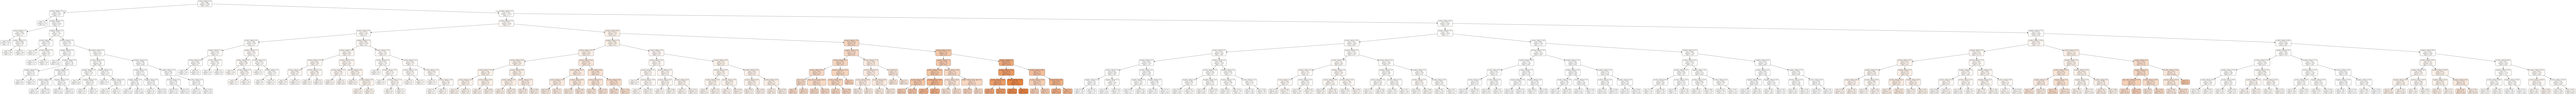

In [12]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(model, out_file=None, feature_names=df.columns[:-1], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())